In [1]:
%matplotlib inline
import warnings; warnings.filterwarnings(action='ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
with open ("smog_code/smog_Parameters.f90", "r") as f:
    code_str = f.readlines()

In [3]:
varnames = []

pattern = 'INTEGER, PARAMETER :: ind_'
for line in code_str:
    if pattern in line:
        varnames.append( line.replace(pattern,'').split()[0] )

print(len(varnames), varnames)

16 ['HNO3', 'O', 'RH', 'RCOO2NO2', 'O3', 'HO2', 'RCOO2', 'RCHO', 'RO2', 'NO', 'NO2', 'OH', 'H2O', 'O2', 'CO', 'CO2']


In [4]:
df = pd.read_csv('smog_code/smog.dat',
                 delim_whitespace=True, header=None, index_col=0)
df.columns = varnames
df.index.name = 'time'

df = df.apply(pd.to_numeric, errors='raise')

In [5]:
df.head()

,HNO3,O,RH,RCOO2NO2,O3,HO2,RCOO2,RCHO,RO2,NO,NO2,OH,H2O,O2,CO,CO2
time,,,,,,,,,,,,,,,,
0.000000,1.000000e-08,1.000000e-08,2.000000,1.000000e-08,1.000000e-08,1.000000e-08,1.000000e-08,2.000000,1.000000e-08,0.500000,0.100000,1.000000e-08,13000.0,200000.0,1.000000e-08,1.000000e-08
0.016667,1.196871e-02,4.732297e-02,1.977752,3.378443e-02,4.626326e-02,9.376380e-07,4.809425e-07,1.988463,8.080372e-07,0.166118,0.388129,3.142789e-08,13000.0,200000.0,1.000000e-08,1.000000e-08
0.033333,2.281362e-02,5.451626e-02,1.966015,6.826272e-02,1.423590e-01,1.834471e-06,6.655699e-07,1.965720,1.441752e-06,0.062340,0.446584,2.289512e-08,13000.0,200000.0,1.000000e-08,1.000000e-08
0.050000,3.202841e-02,5.279558e-02,1.956457,1.038050e-01,2.702240e-01,3.193612e-06,9.467450e-07,1.939735,2.406002e-06,0.031787,0.432380,2.061908e-08,13000.0,200000.0,1.000000e-08,1.000000e-08
0.066667,4.018576e-02,4.889150e-02,1.947524,1.397943e-01,4.021306e-01,4.864673e-06,1.303912e-06,1.912677,3.600820e-06,0.019676,0.400344,1.992698e-08,13000.0,200000.0,1.000000e-08,1.000000e-08


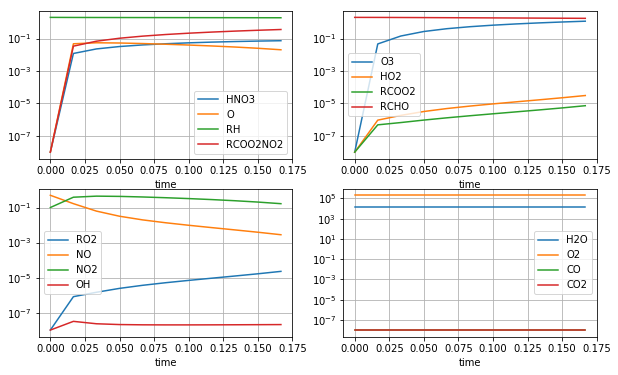

In [6]:
N_sub = 4
N_figures = 4

fig, axes = plt.subplots(N_figures//2, 2, figsize=[10, 6])

for i in range(N_figures):
    sub_name = varnames[i*N_sub:(i+1)*N_sub]
    df.plot(y=sub_name, logy=True, grid=True, ax=axes.ravel()[i])

# Compare with f2py results

In [7]:
from importlib import reload

In [8]:
import smog_code.kpp4py as kpp4py

In [9]:
reload(kpp4py)

<module 'smog_code.kpp4py' from '/Users/zhuangjw/Research/Computing/KPP/kpp-2.2.3/my_tests/smog/smog_code/kpp4py.cpython-36m-darwin.so'>

In [10]:
y0 = df.values[0,:12]
y0

array([  9.99999994e-09,   9.99999994e-09,   2.00000000e+00,
         9.99999994e-09,   9.99999994e-09,   9.99999994e-09,
         9.99999994e-09,   2.00000000e+00,   9.99999994e-09,
         5.00000000e-01,   1.00000001e-01,   9.99999994e-09])

In [11]:
kpp4py.kpp(y0)

array([  7.30405398e-02,   2.02432711e-02,   1.89535750e+00,
         3.58497830e-01,   1.16335927e+00,   3.07362535e-05,
         7.25971867e-06,   1.74611492e+00,   2.25209298e-05,
         2.79077039e-03,   1.65670881e-01,   2.05579293e-08])

In [12]:
df.values[-1,:12]

array([  7.30405398e-02,   2.02432711e-02,   1.89535750e+00,
         3.58497830e-01,   1.16335927e+00,   3.07362535e-05,
         7.25971867e-06,   1.74611492e+00,   2.25209298e-05,
         2.79077039e-03,   1.65670881e-01,   2.05579293e-08])